<a href="https://colab.research.google.com/github/danielreinaux/HeartDisease/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fase de Implementação do Modelo de Machine Learning
Nesta fase, utilizaremos os dados analisados previamente para construir um modelo que possa fazer previsões sobre novos dados. Dividimos o processo em duas partes principais:

## 1.1 Data Preparation (DataPrep)
Esta etapa consiste na preparação dos dados para que possam ser usados no modelo de machine learning. Envolve:

Limpeza de dados: Remover valores nulos ou inconsistentes.

Normalização/Padronização: Dependendo do modelo que utilizaremos, os dados podem precisar ser normalizados (colocados em uma escala comum).

Divisão dos dados: Dividir os dados entre conjunto de treino (70%) e conjunto de teste (30%) para avaliar o desempenho do modelo.

## 1.2 Modelagem dos Dados e Análise dos Resultados
Nesta etapa, construiremos o modelo de Machine Learning e avaliaremos seu desempenho:

Escolha do algoritmo: Selecionaremos um ou mais algoritmos adequados (ex.: Logistic Regression, Random Forest, etc.) para resolver o problema de classificação.

Treinamento do modelo: Usaremos os dados de treino para treinar o modelo.
Avaliação do modelo: Avaliaremos o modelo nos dados de teste, utilizando métricas como acurácia, precisão, recall e F1-score.

Ajuste de hiperparâmetros: Utilizaremos técnicas como GridSearchCV ou RandomizedSearchCV para encontrar a melhor configuração de hiperparâmetros.

Validação cruzada: Implementaremos a validação cruzada (K-Fold) para garantir a robustez do modelo e evitar overfitting.

### 1.1 DataPrep:
Como mencionado acima, nosso processo de DataPrep envolve:
* Divisão de treino e teste, que no nosso caso será: 70% e 30%
* Limpeza de Dados
* Encoders dos dados: Utilizando LabelEncoder e OneHotEncoder
* Normalização/Padronização dos Dadds

#### 1.1.1 Visualizando nosso Dataset

Como já fizemos uma análise de dados, não estarei trazendo um dicionário de metadados, além de análises mais complexas em relação a nosso dataset.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df_heart = pd.read_csv("/content/heart.csv")
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### 1.1.2 Dividindo entre treino e teste:

É fundamental realizar a imputação de valores ausentes, normalização e outros passos de DataPrep somente após a divisão dos dados em treino e teste. Isso evita o chamado Data Leakage (vazamento de dados), que ocorre quando informações dos dados de teste "vazam" para os dados de treino, comprometendo a qualidade do nosso modelo.

Por exemplo, se relizarmos a imputação da média ou qualquer outra transformação antes da divisãi, a média seria calculada com base em todo o conjunto de dados (incluindo o conjunto de teste). Isso significa que o modelo treinado teria acesso a informações do conjunto de teste de forma indireta, o que resultaria em uma avaliação distorcida, jpa que o modelo teria "visto" dados que não deveria.

In [3]:
X_heart = df_heart.drop(columns=['target'])
y_heart = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((717, 13), (308, 13))

Agora, estaremos criando nossa pipeline.
Sobretudo, como já analisado, existem dois processos que não precisaram ser feitos:
* Imputação de valores nulos: Como vimos, nosso dataset não apresenta valores nulos, logo, não precisaremos colocar essa etapa no nosso processo
* Encoders: Esse processo ocorre quando temos colunas categóricas, mas esse processo já foi feito anteriormente em nosso dataset, pois todas as colunas já estão em formato numérico.

Logo, faremos apenas o processo de Normalização/Padronização dos nosso dados


#### 1.1.3 Padronizando nossos dados

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_01 = pd.DataFrame(X_train_scaled, columns = X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_01 = pd.DataFrame(X_test_scaled, columns = X_test.columns, index=X_test.index)

In [5]:
X_train_scaled_01.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,0.512272,0.643585,0.029318,0.463632,-0.484673,-0.427982,0.93004,0.613085,1.409787,-0.898563,0.977081,-0.728375,-0.538128
479,0.402236,0.643585,-0.926191,-0.218847,-0.588209,-0.427982,-0.99724,-0.840151,1.409787,1.030388,-0.652145,2.109914,1.103735
227,-1.138262,-1.553797,0.984827,-0.787579,-0.049819,-0.427982,0.93004,-0.047477,-0.709327,-0.635524,-0.652145,0.217721,-0.538128
910,-0.478048,0.643585,0.984827,0.463632,-0.236185,-0.427982,0.93004,0.569047,-0.709327,-0.372485,-0.652145,0.217721,1.103735
362,-1.248297,-1.553797,0.984827,-0.560086,-0.650331,-0.427982,0.93004,0.657122,-0.709327,-0.723203,-0.652145,-0.728375,-0.538128


## 1.2 Modelagem dos Dados e Análise dos Resultados:

1. **Teste com o conjunto de treino (X_train): **
Primeiro, treinaremos o modelo utilizando apenas o conjunto de treino (X_train) para observar o desempenho inicial e detectar possíveis ajustes. Avaliaremos o modelo com base nos dados de treino para garantir que ele esteja ajustado adequadamente.

2. **Teste com o conjunto de teste (X_test): **
Após o treinamento, avaliaremos o desempenho final no conjunto de teste (X_test) para verificar se o modelo generaliza bem para novos dados. Isso garante que o modelo não está sobreajustado ao conjunto de treino.

3. **Dividindo por algoritmos: **
Testaremos diferentes algoritmos de Machine Learning. Primeiro, avaliaremos os algoritmos na sua forma básica (sem ajustes) em ambos os conjuntos (treino e teste). Em seguida, realizaremos a tunagem dos hiperparâmetros para melhorar o desempenho, garantindo que as melhorias sejam refletidas tanto no conjunto de treino quanto no conjunto de teste.


Estaremos para uma avaliação correta trazendo as métricas:

* Matrix de Confusão: A Matriz de Confusão nos oferece uma visão detalhada das classificações feitas pelo modelo, dividindo-as em quatro categorias: Verdadeiros Positivos (VP), Falsos Positivos (FP), Verdadeiros Negativos (VN) e Falsos Negativos (FN).
* Curva ROC: Vai nos trazer a capacidade do modelo em distinguir entre as classes, ela é formada ao plotar a Taxa de Verdadeiros Positivos (sensibilidade/recall) contra a Taxa de Falsos Positivos para diferentes limiares de decisão. Quanto mais próxima a curva etiver do canto superior esquerdo, melhor vai ser a capacidade do modelo de separar corretamente as classes.
* Foco no Recall: Para o diagnóstico de doenças cardíacas, a métrica mais importante a ser observada é o Recall, pois o falso engativo é o erro mais perigoso. No nosso contexto, de doenças cardíacas, um falso negativo pode impedir que essa pessoa receba o tratamento necessário.




In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, precision_score, recall_score, roc_auc_score


def avaliar_modelo(X_train, y_train, X_test, y_test, modelo, nm_modelo):

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Alterado para 2x2 grid, para 4 gráficos no total
    plt.tight_layout(pad=5.0)

    # Confusion Matrix - Treino e Teste
    for i, (X, y, dataset) in enumerate([(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]):
        y_pred = modelo.predict(X)
        cm = confusion_matrix(y, y_pred)
        axs[0, i].imshow(cm, cmap='Blues', interpolation='nearest')
        axs[0, i].set_title(f'Matriz de Confusão - {dataset} - {nm_modelo}')
        axs[0, i].set_xticks([0, 1])
        axs[0, i].set_yticks([0, 1])
        axs[0, i].set_xticklabels(['0', '1'])
        axs[0, i].set_yticklabels(['0', '1'])
        for j in range(cm.shape[0]):
            for k in range(cm.shape[1]):
                axs[0, i].text(k, j, cm[j, k], ha="center", va="center", color="black")

    # ROC Curve - Treino e Teste
    for i, (X, y, dataset) in enumerate([(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]):
        y_score = modelo.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_score)
        axs[1, i].plot(fpr, tpr, label=f'{dataset} ROC')
        axs[1, i].plot([0, 1], [0, 1], linestyle='--')
        axs[1, i].set_title(f'Curva ROC - {dataset} - {nm_modelo}')
        axs[1, i].set_xlabel('Taxa de Falsos Positivos')
        axs[1, i].set_ylabel('Taxa de Verdadeiros Positivos')

    # Gráfico de barras para Precision e Recall - Treino e Teste
    precision_train = precision_score(y_train, modelo.predict(X_train))
    recall_train = recall_score(y_train, modelo.predict(X_train))

    precision_test = precision_score(y_test, modelo.predict(X_test))
    recall_test = recall_score(y_test, modelo.predict(X_test))

    metrics_train = [precision_train, recall_train]
    metrics_test = [precision_test, recall_test]

    labels = ['Precision', 'Recall']

    # Gráfico de barras para Precision e Recall
    fig, ax = plt.subplots(figsize=(6, 4))  # Criar novo gráfico para barras fora do grid anterior
    x = np.arange(len(labels))
    width = 0.35  # Largura das barras

    ax.bar(x - width/2, metrics_train, width, label='Treino', color='skyblue')
    ax.bar(x + width/2, metrics_test, width, label='Teste', color='darkorange')

    # Configuração do gráfico de barras
    ax.set_title(f'Precision e Recall - {nm_modelo}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)  # Definir o limite de 0 a 1 para a escala
    ax.legend(loc='upper right')

    plt.show()

    # Cálculo de métricas para a tabela
    accuracy_train = accuracy_score(y_train, modelo.predict(X_train))
    accuracy_test = accuracy_score(y_test, modelo.predict(X_test))

    # Gini e AUC - Treino e Teste
    y_score_train = modelo.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_score_train)

    y_score_test = modelo.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_score_test)

    results = {
        'Métrica': ['Acurácia', 'Recall', 'Precision', 'AUC'],
        'Treino': [accuracy_train, recall_train, precision_train, auc_train],
        'Teste': [accuracy_test, recall_test, precision_test, auc_test]
    }

    df_results = pd.DataFrame(results)

    print(df_results)


### 1.2.1 Árvore de Decisão:

Árvores de decisões são bases para muitos modelos. Estaremos utilizando-a com a tunagem de hiperparâmetros, utilizando o GridSearch.

Os hiperparâmetros são fundamentais para evitarmos alguns problemas.
O **max_depth**, por exemplo, é essencial para evitar o Overfitting. Se a profundidade da nossa árvore é muito alto, muito provavelmente nosso algoritmo vai decorar os dados.



In [14]:
model = DecisionTreeClassifier()

param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best'],
    'max_depth': [10,20,30], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.02,0.04], # Número mínimo de amostras necessárias para estar em um nó folha.
}


# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_scaled_01, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

Melhores Parâmetros:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 0.02, 'min_samples_split': 0.008, 'splitter': 'best'}


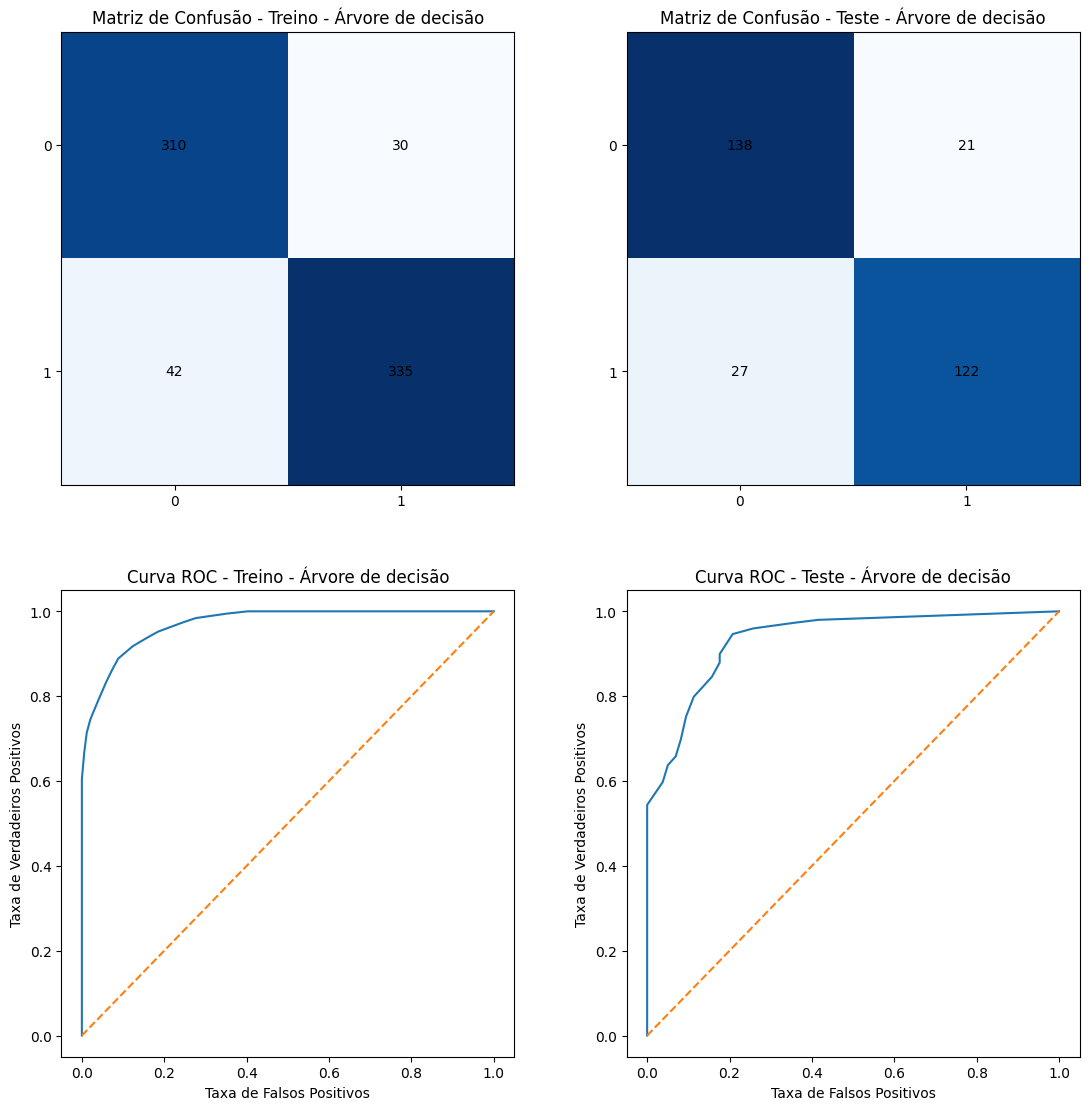

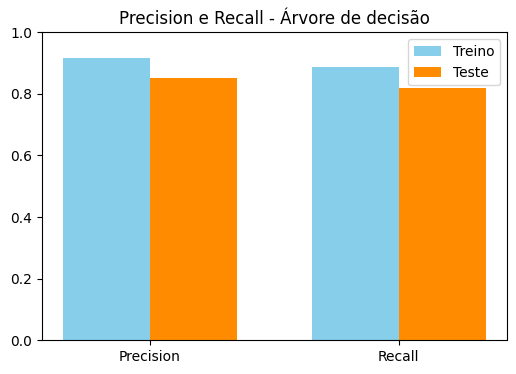

     Métrica    Treino     Teste
0   Acurácia  0.899582  0.844156
1     Recall  0.888594  0.818792
2  Precision  0.917808  0.853147
3        AUC  0.970303  0.934764


In [15]:
avaliar_modelo(X_train_scaled_01, y_train, X_test_scaled_01, y_test, grid.best_estimator_, nm_modelo="Árvore de decisão" )

#### Analisando Resultados:

1. Matriz de confusão: Apresenta um resultado muito positivo, tanto na classe de testes quanto na classe de treino. Apesar de pequeno, o erro dos falsos negativos está um pouco maior (erro bem prejudicial para nosso problema)

2. A curva ROC apresenta valores bem satisfatórios, com sua curva bem próxima ao canto superior direito.

3. Recall e Precision: Como já visto na Matriz de confusão, o Recall e o Precision estão bem altos.

### 1.2.2 Regressão Logística:

A regressão logística é um algoritmo que vai estar calculando os melhores pesos para nossas features, transformando também a equação das nossas features em porcentagem, pela função sigmodal.

Temos alguns hiperparâmetros interessantes:

* O parâmetro do max_iter vai definir o número máximo de iteraçoes que o algoritmo vai executar durante o processo do ajuste.

* O parâmetro tol define a tolerância de melhoria mínima da função de custo entre as interações. Se a melhoria entre duas iterações consecutivas for menor que esse valor, o algoritmo vai considerar que atingiu a convergência.

In [20]:
model = LogisticRegression(max_iter=100)

# Definindo os parâmetros para o grid search
param_grid = {
    'penalty':['l1','l2'],
    'tol':[0.00001,0.0001,0.001],
    'C': [1.0, 2.0],
    'solver':['liblinear', 'saga'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
}


# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_scaled_01, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_rl = grid.best_estimator_

Melhores Parâmetros:  {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
Melhor AUC:  0.9191160990712074


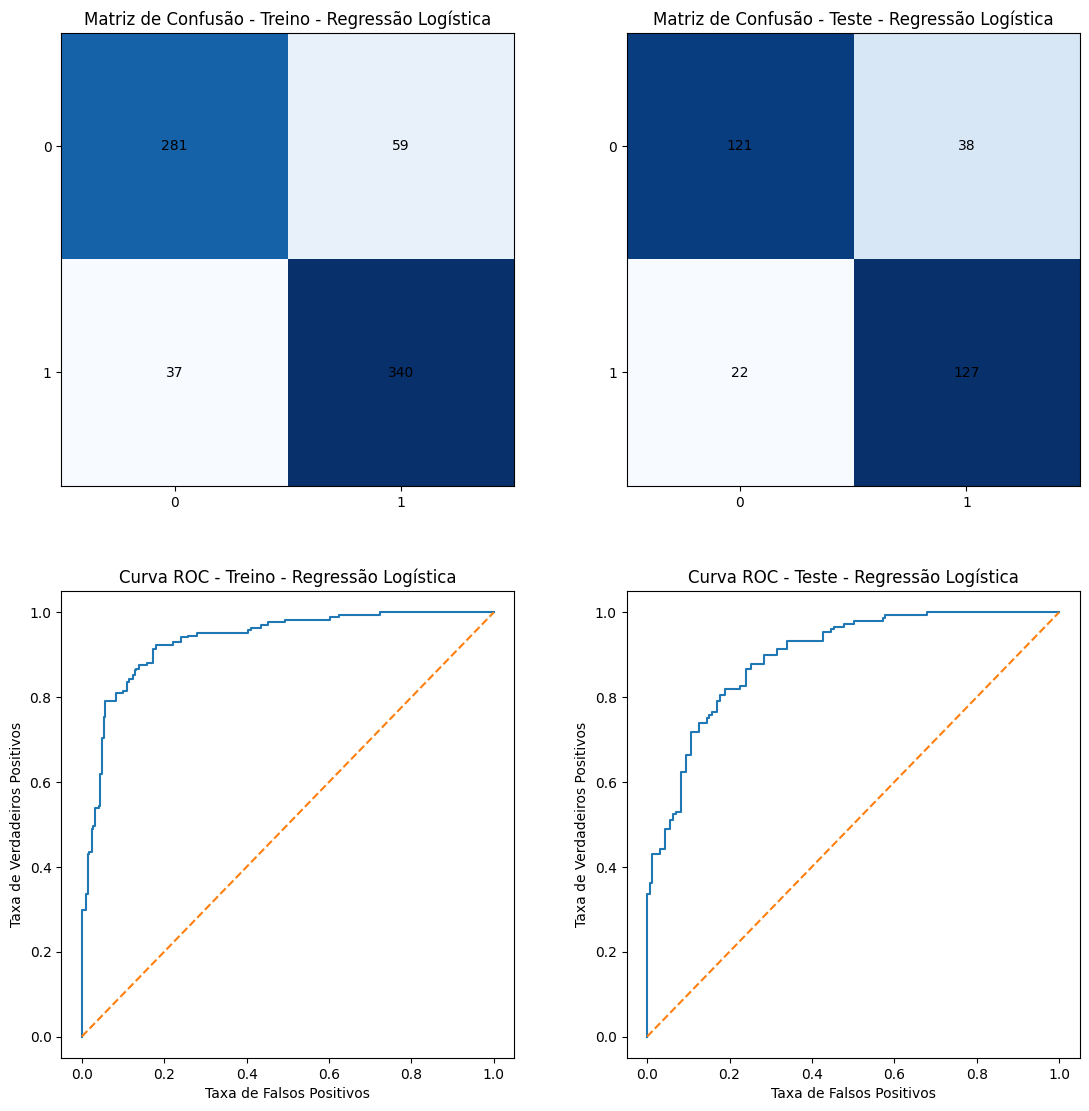

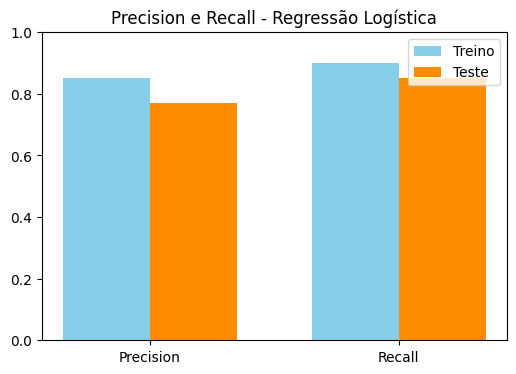

     Métrica    Treino     Teste
0   Acurácia  0.866109  0.805195
1     Recall  0.901857  0.852349
2  Precision  0.852130  0.769697
3        AUC  0.933196  0.896036


In [21]:
avaliar_modelo(X_train_scaled_01, y_train, X_test_scaled_01, y_test, best_model_rl, nm_modelo="Regressão Logística" )

#### Analisando Resultados:

1. Matriz de Confusão: Novamente apresentando resultados bem sólidos. Além disso, o erro dos falsos negativos diminuiu, refletindo inclusive no nosso Recall. Como dito anteriormente, métrica fundamental para nosso modelo

2. Curva ROC: A curva ROC novamente apresentando bons resultados.


### 1.2.3 Random Forest:

Algoritmo que utiliza o Bagging com várias árvores para melhorar seu modelo e desempenho.
Existem alguns hiperparâmetros interessantes desse algoritmo:
* n_estimators: Número de árvores que estão no conjunto. Geralmente vai ter como parão 100 árvores. Quanto maior o número de árvores, mais robusto vai ser o modelo, porém também será mais caro em termos de computação.
* bootstrap: Vai indicar se a amostragem com reposição vai existir ou não. Basicamente, amostragens com reposições são aquelas em que uma instância pode estar em mais de uma amostra.

In [22]:
model = RandomForestClassifier()


# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [10, 50,100, 150],
    'max_depth': [2, 3, 5],
    'min_samples_split': [0.001, 0.01],
    'min_samples_leaf': [2, 0.01],
    'bootstrap': [True, False],
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_scaled_01, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

best_model_rf = grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores Parâmetros:  {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 0.001, 'n_estimators': 150}
Melhor AUC:  0.9706140350877194


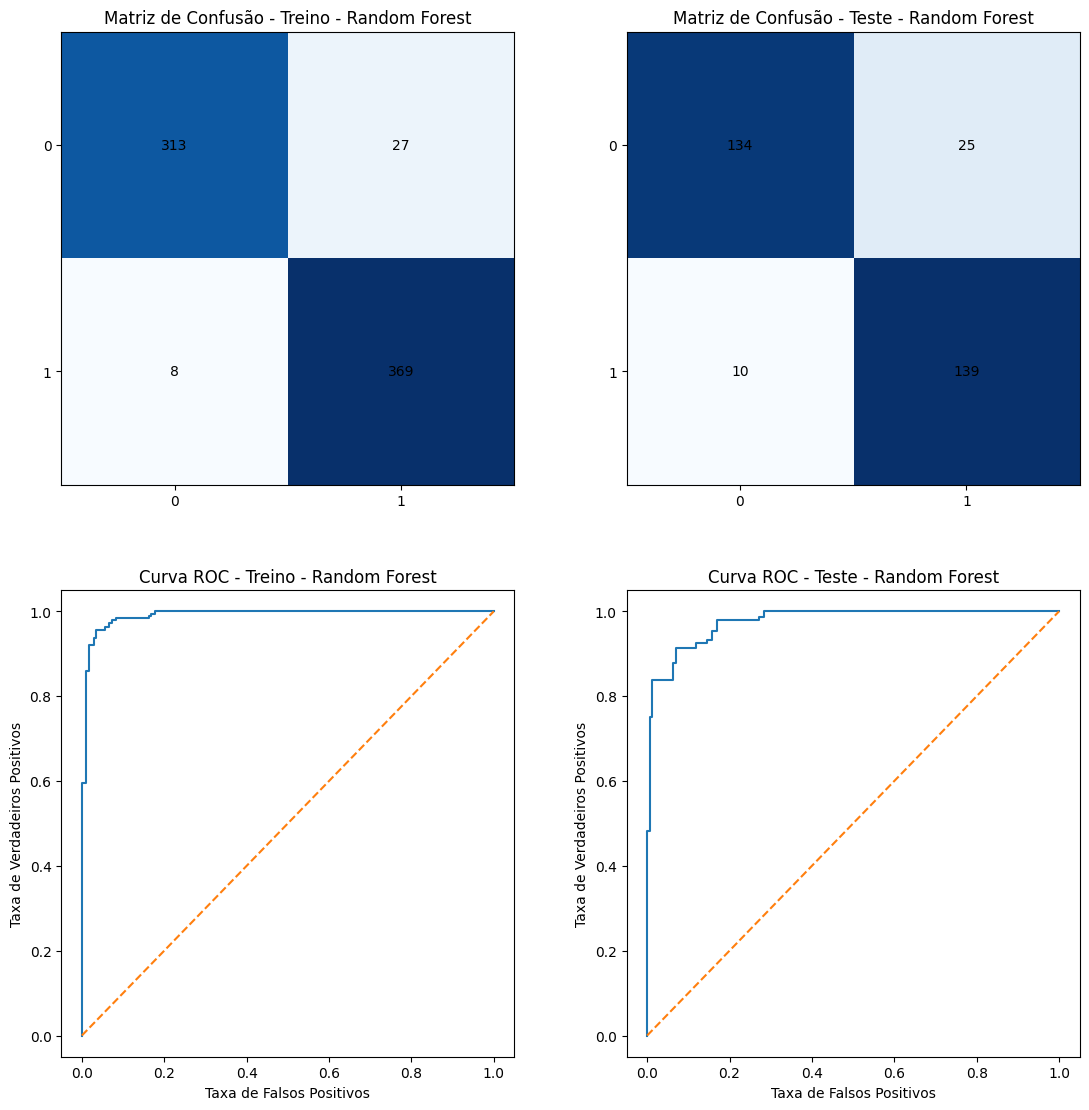

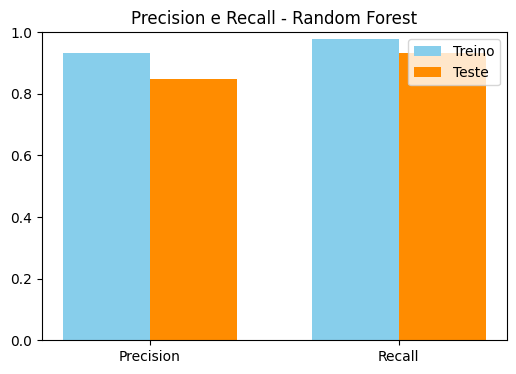

     Métrica    Treino     Teste
0   Acurácia  0.951185  0.886364
1     Recall  0.978780  0.932886
2  Precision  0.931818  0.847561
3        AUC  0.990818  0.976447


In [23]:
avaliar_modelo(X_train_scaled_01, y_train, X_test_scaled_01, y_test, best_model_rf, nm_modelo='Random Forest')

#### Analisando Resultados:

* Matriz de confusão: Teve os melhores resultados até então, com pouquíssimos erros
* Possuindo uma curva ROC de 0.97 de teste
* Até então, nosso melhor modelo, com um Precision e um Recall também muito altos.

### 1.2.4 Gradient Boosting:

Houve uma 'poda' em relação aos hiperparâmetros, como o n_estimators, pela nossa base ser pequena e acabar não gerando resultados irreais (muito próximos da perfeição).
Apesar disso, pela robustez do modelo, ainda obtivemos ótimos resultados.

In [49]:
model_gb = GradientBoostingClassifier()

# Definindo o param_grid para Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 20],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1,2],
    'subsample': [0.7, 0.8, 1.0] # Adicionando subsample para regularização
}

grid_gb = GridSearchCV(
    model_gb,
    param_grid_gb,
    cv=3,
    verbose=2,
    scoring='roc_auc',
    n_jobs=-1
)

grid_gb.fit(X_train_scaled_01, y_train)

print("Melhores Parâmetros: ", grid_gb.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid_gb.best_score_)

best_model_gb = grid_gb.best_estimator_



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Melhores Parâmetros:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20, 'subsample': 0.7}
Melhor AUC:  0.967684471749679


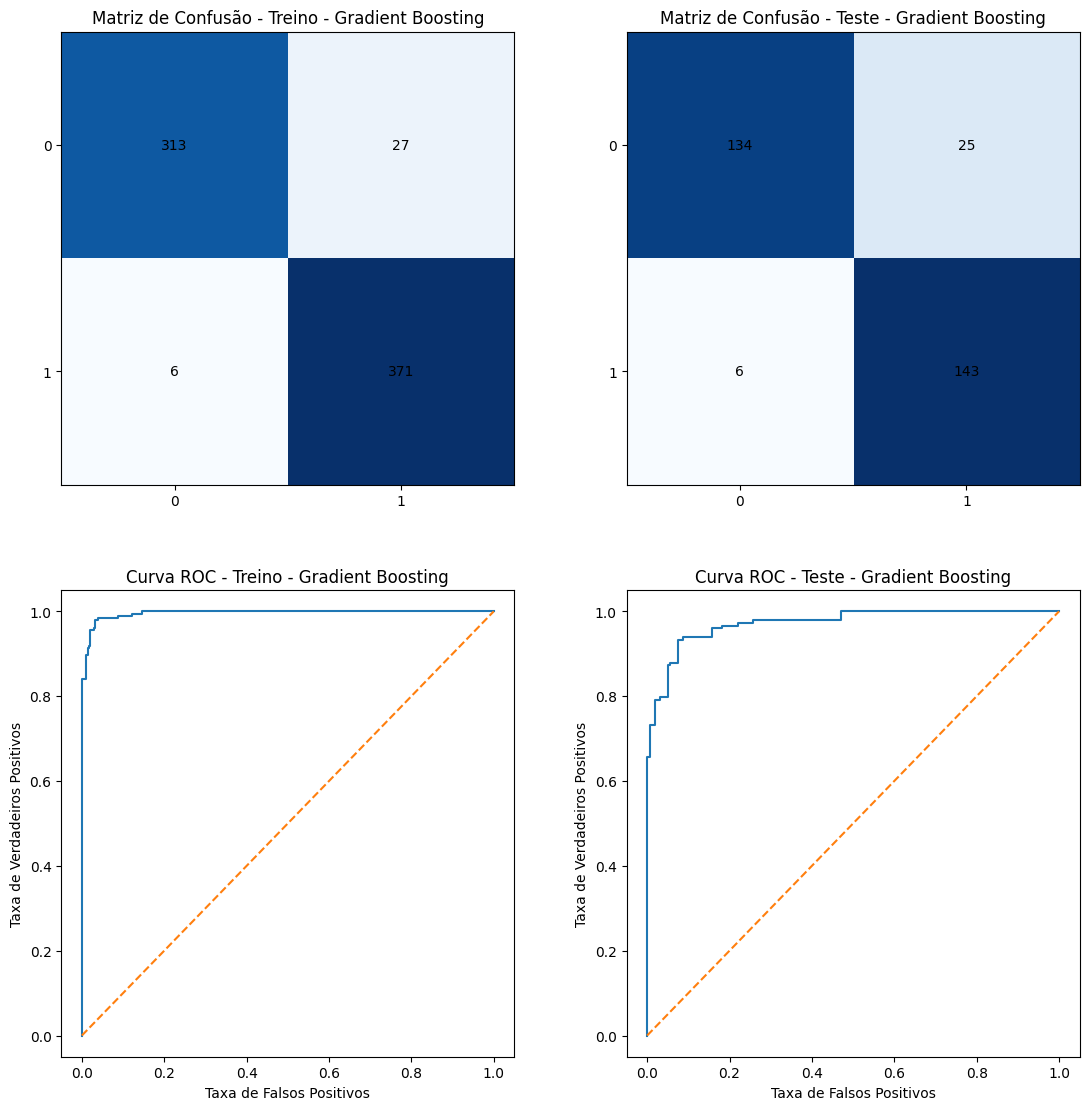

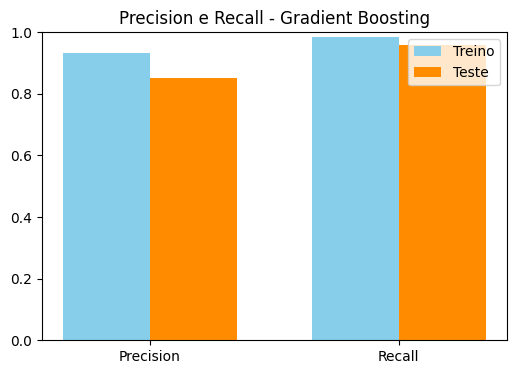

     Métrica    Treino     Teste
0   Acurácia  0.953975  0.899351
1     Recall  0.984085  0.959732
2  Precision  0.932161  0.851190
3        AUC  0.995569  0.972352


In [50]:
avaliar_modelo(X_train_scaled_01, y_train, X_test_scaled_01, y_test, best_model_gb, nm_modelo='Gradient Boosting')

## Analisando Resultados

* Dentre todos os modelos, foi o que teve o melhor resultado, com um Recall muito bom (métrica fundamental no nosso projeto).


O Gradient Boosting é um modelo mais complexo do que os escolhidos anteriormente, por isso, obteve os melhores resultados. Logo, estaremos salvando esse modelo, para uso futuro:

In [56]:
import joblib

joblib.dump(best_model_gb, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']